In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
%matplotlib inline

In [2]:
df_train = pd.read_excel("dataset/fruits_train.xlsx")
df_test = pd.read_excel("dataset/fruits_test.xlsx")
df_train

,Color,Diameter,Label
0,Red,4,Apple
1,Orange,4,Orange
2,Orange,3,Orange
3,Red,5,Apple
4,Orange,3,Orange
5,Red,1,Cherries
6,Yellow,3,Citrus
7,Red,2,Cherries
8,Yellow,4,Citrus


In [3]:
train, test = df_train, df_test
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 9
Number of observations in the test data: 4


In [4]:
train['Diameter'] = pd.to_numeric(train['Diameter'], downcast='float')
test['Diameter'] = pd.to_numeric(test['Diameter'], downcast='float')
train

,Color,Diameter,Label
0,Red,4.0,Apple
1,Orange,4.0,Orange
2,Orange,3.0,Orange
3,Red,5.0,Apple
4,Orange,3.0,Orange
5,Red,1.0,Cherries
6,Yellow,3.0,Citrus
7,Red,2.0,Cherries
8,Yellow,4.0,Citrus


In [5]:
# Features
features = ['Color', 'Diameter']
classes = ['Apple','Orange','Cherries','Citrus']
train['Color'] = pd.factorize(train['Color'])[0]
test['Color'] = pd.factorize(test['Color'])[0]
# Target Feature
y = pd.factorize(train['Label'])[0]

print(train)
print(test)

   Color  Diameter     Label
0      0       4.0     Apple
1      1       4.0    Orange
2      1       3.0    Orange
3      0       5.0     Apple
4      1       3.0    Orange
5      0       1.0  Cherries
6      2       3.0    Citrus
7      0       2.0  Cherries
8      2       4.0    Citrus
   Color  Diameter     Label
0      0       3.0    Orange
1      1       5.0     Apple
2      1       2.0  Cherries
3      2       4.0    Citrus


In [6]:
clf = RandomForestClassifier(random_state=0, n_estimators=3, criterion='entropy')
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [7]:
clf.feature_importances_

array([0.40847421, 0.59152579])

In [8]:
clf.predict(test[features])

array([1, 0, 2, 3], dtype=int64)

In [9]:
def export_graph(estimator):
    # Export as dot file
    export_graphviz(estimator, out_file='tree.dot', 
                    feature_names = features,
                    class_names = classes,
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in jupyter notebook
    Image(filename = 'tree.png')

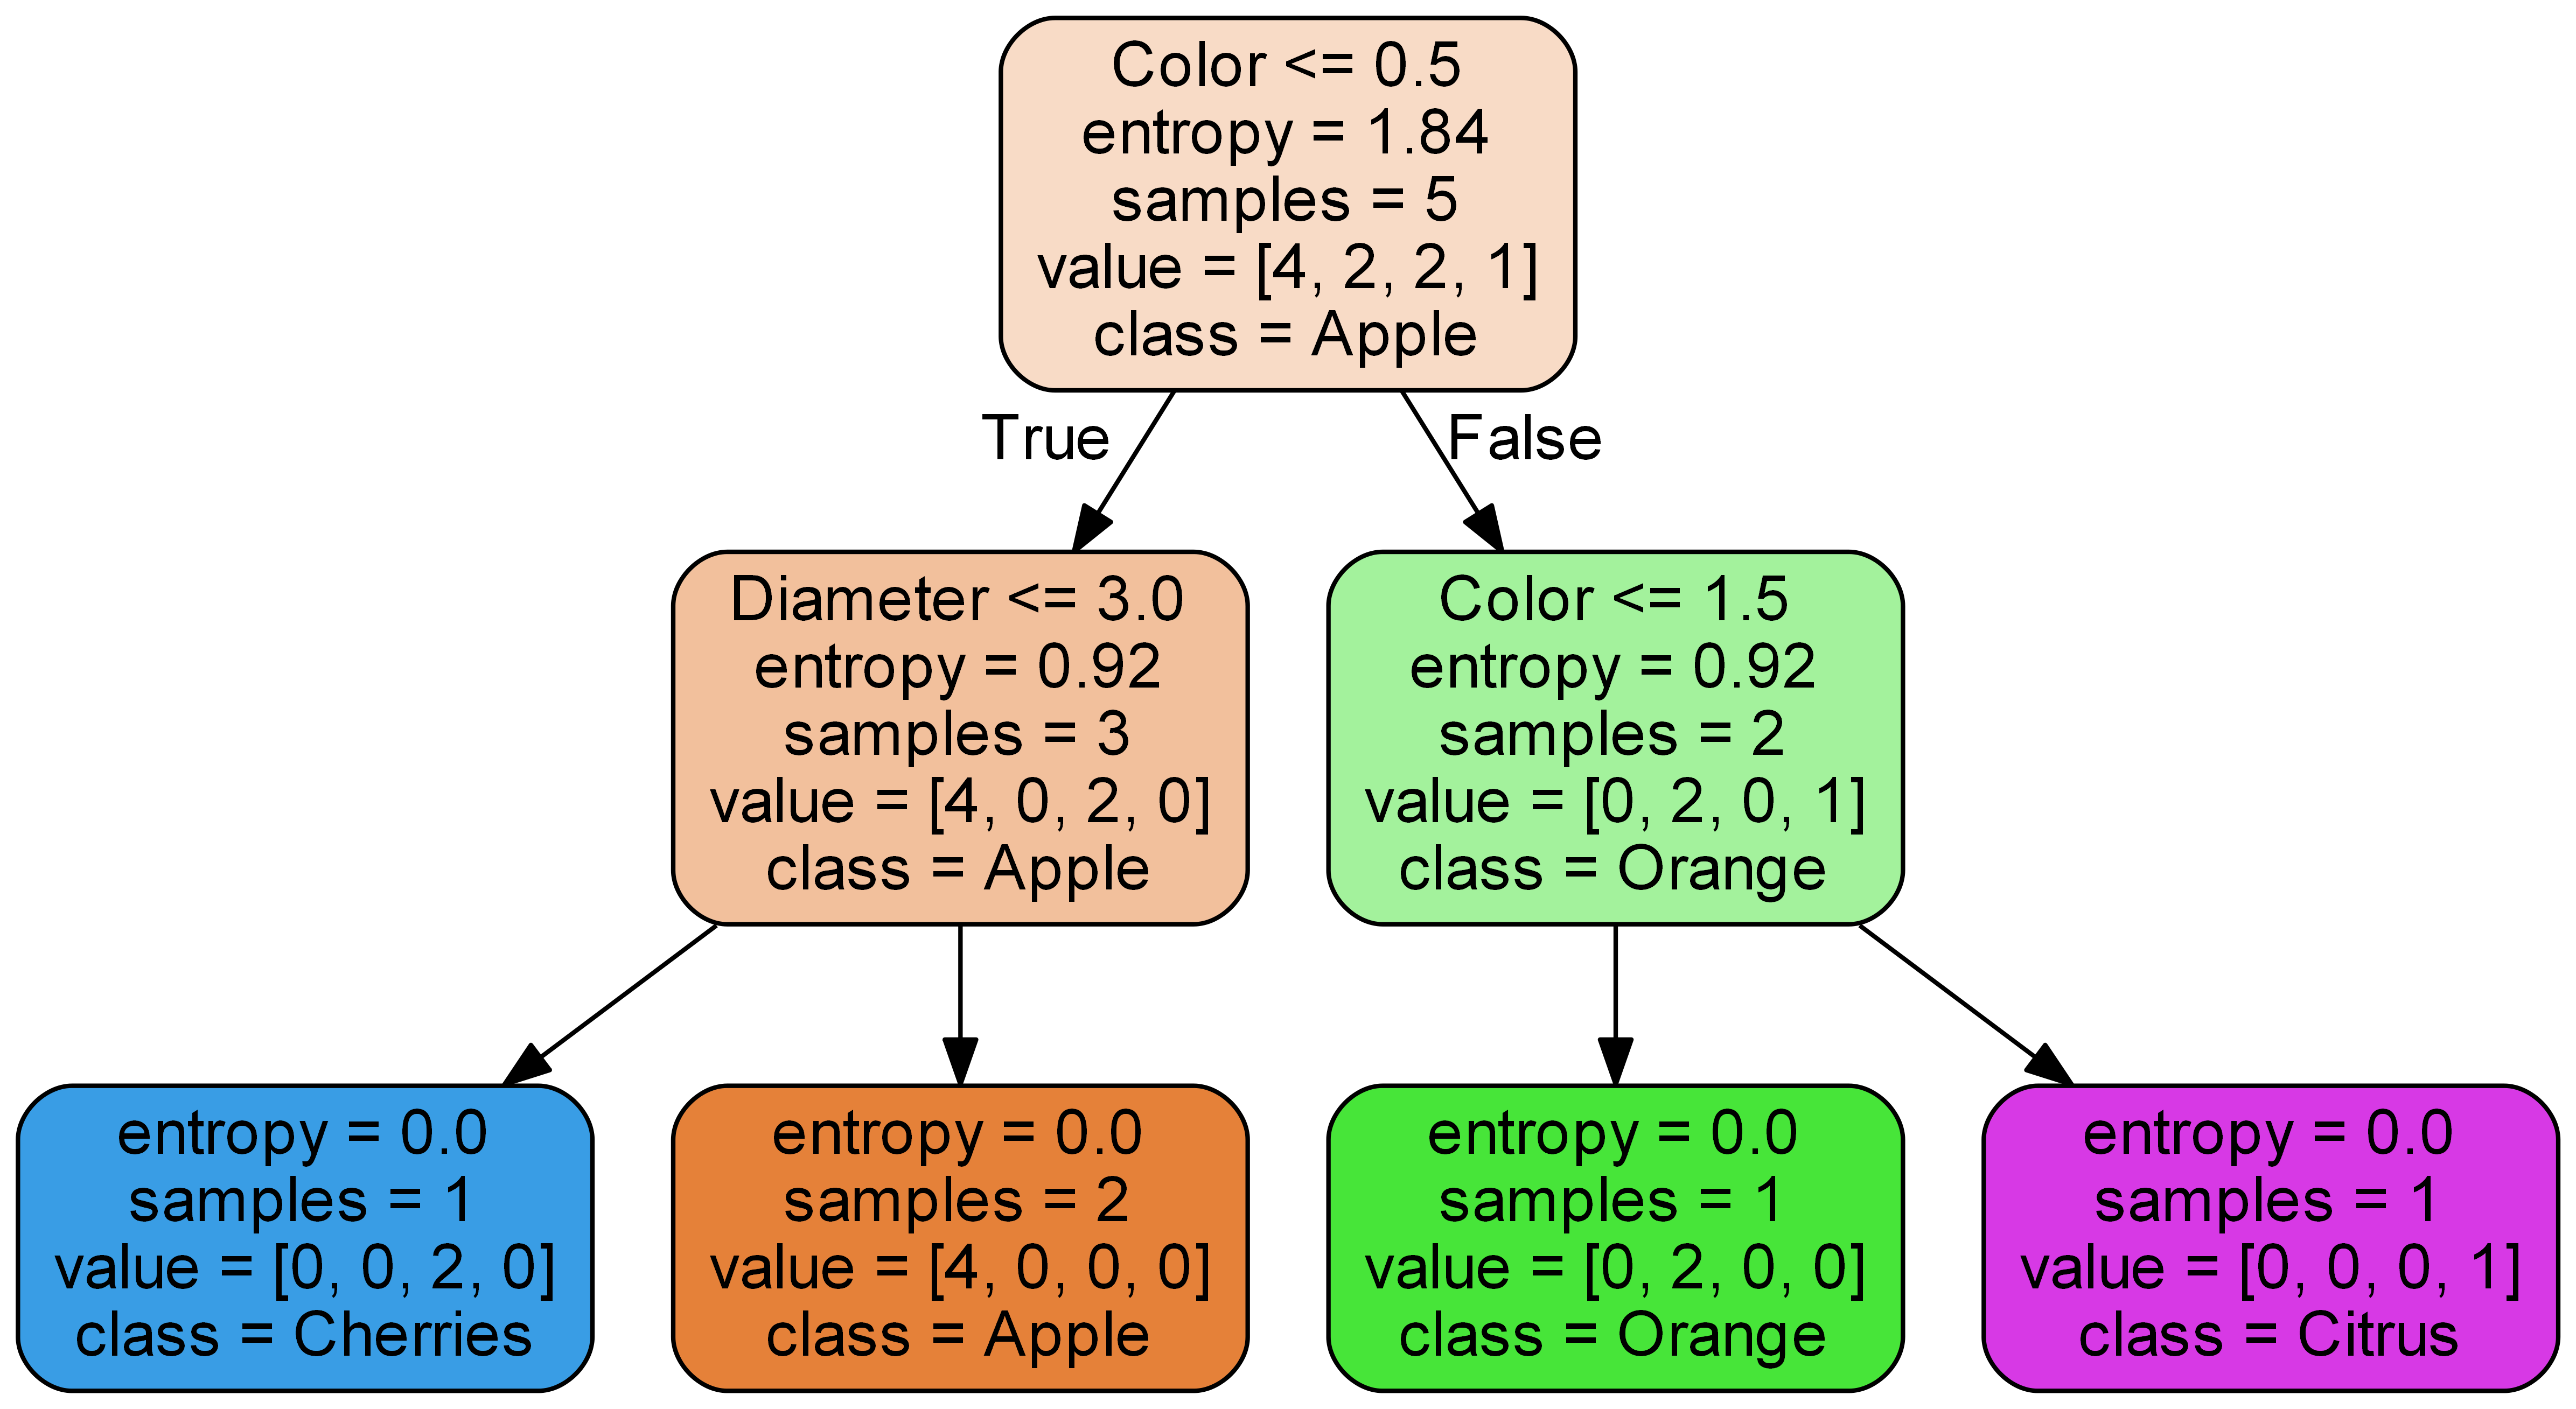

In [10]:
export_graph(clf.estimators_[0])
Image(filename = 'tree.png')

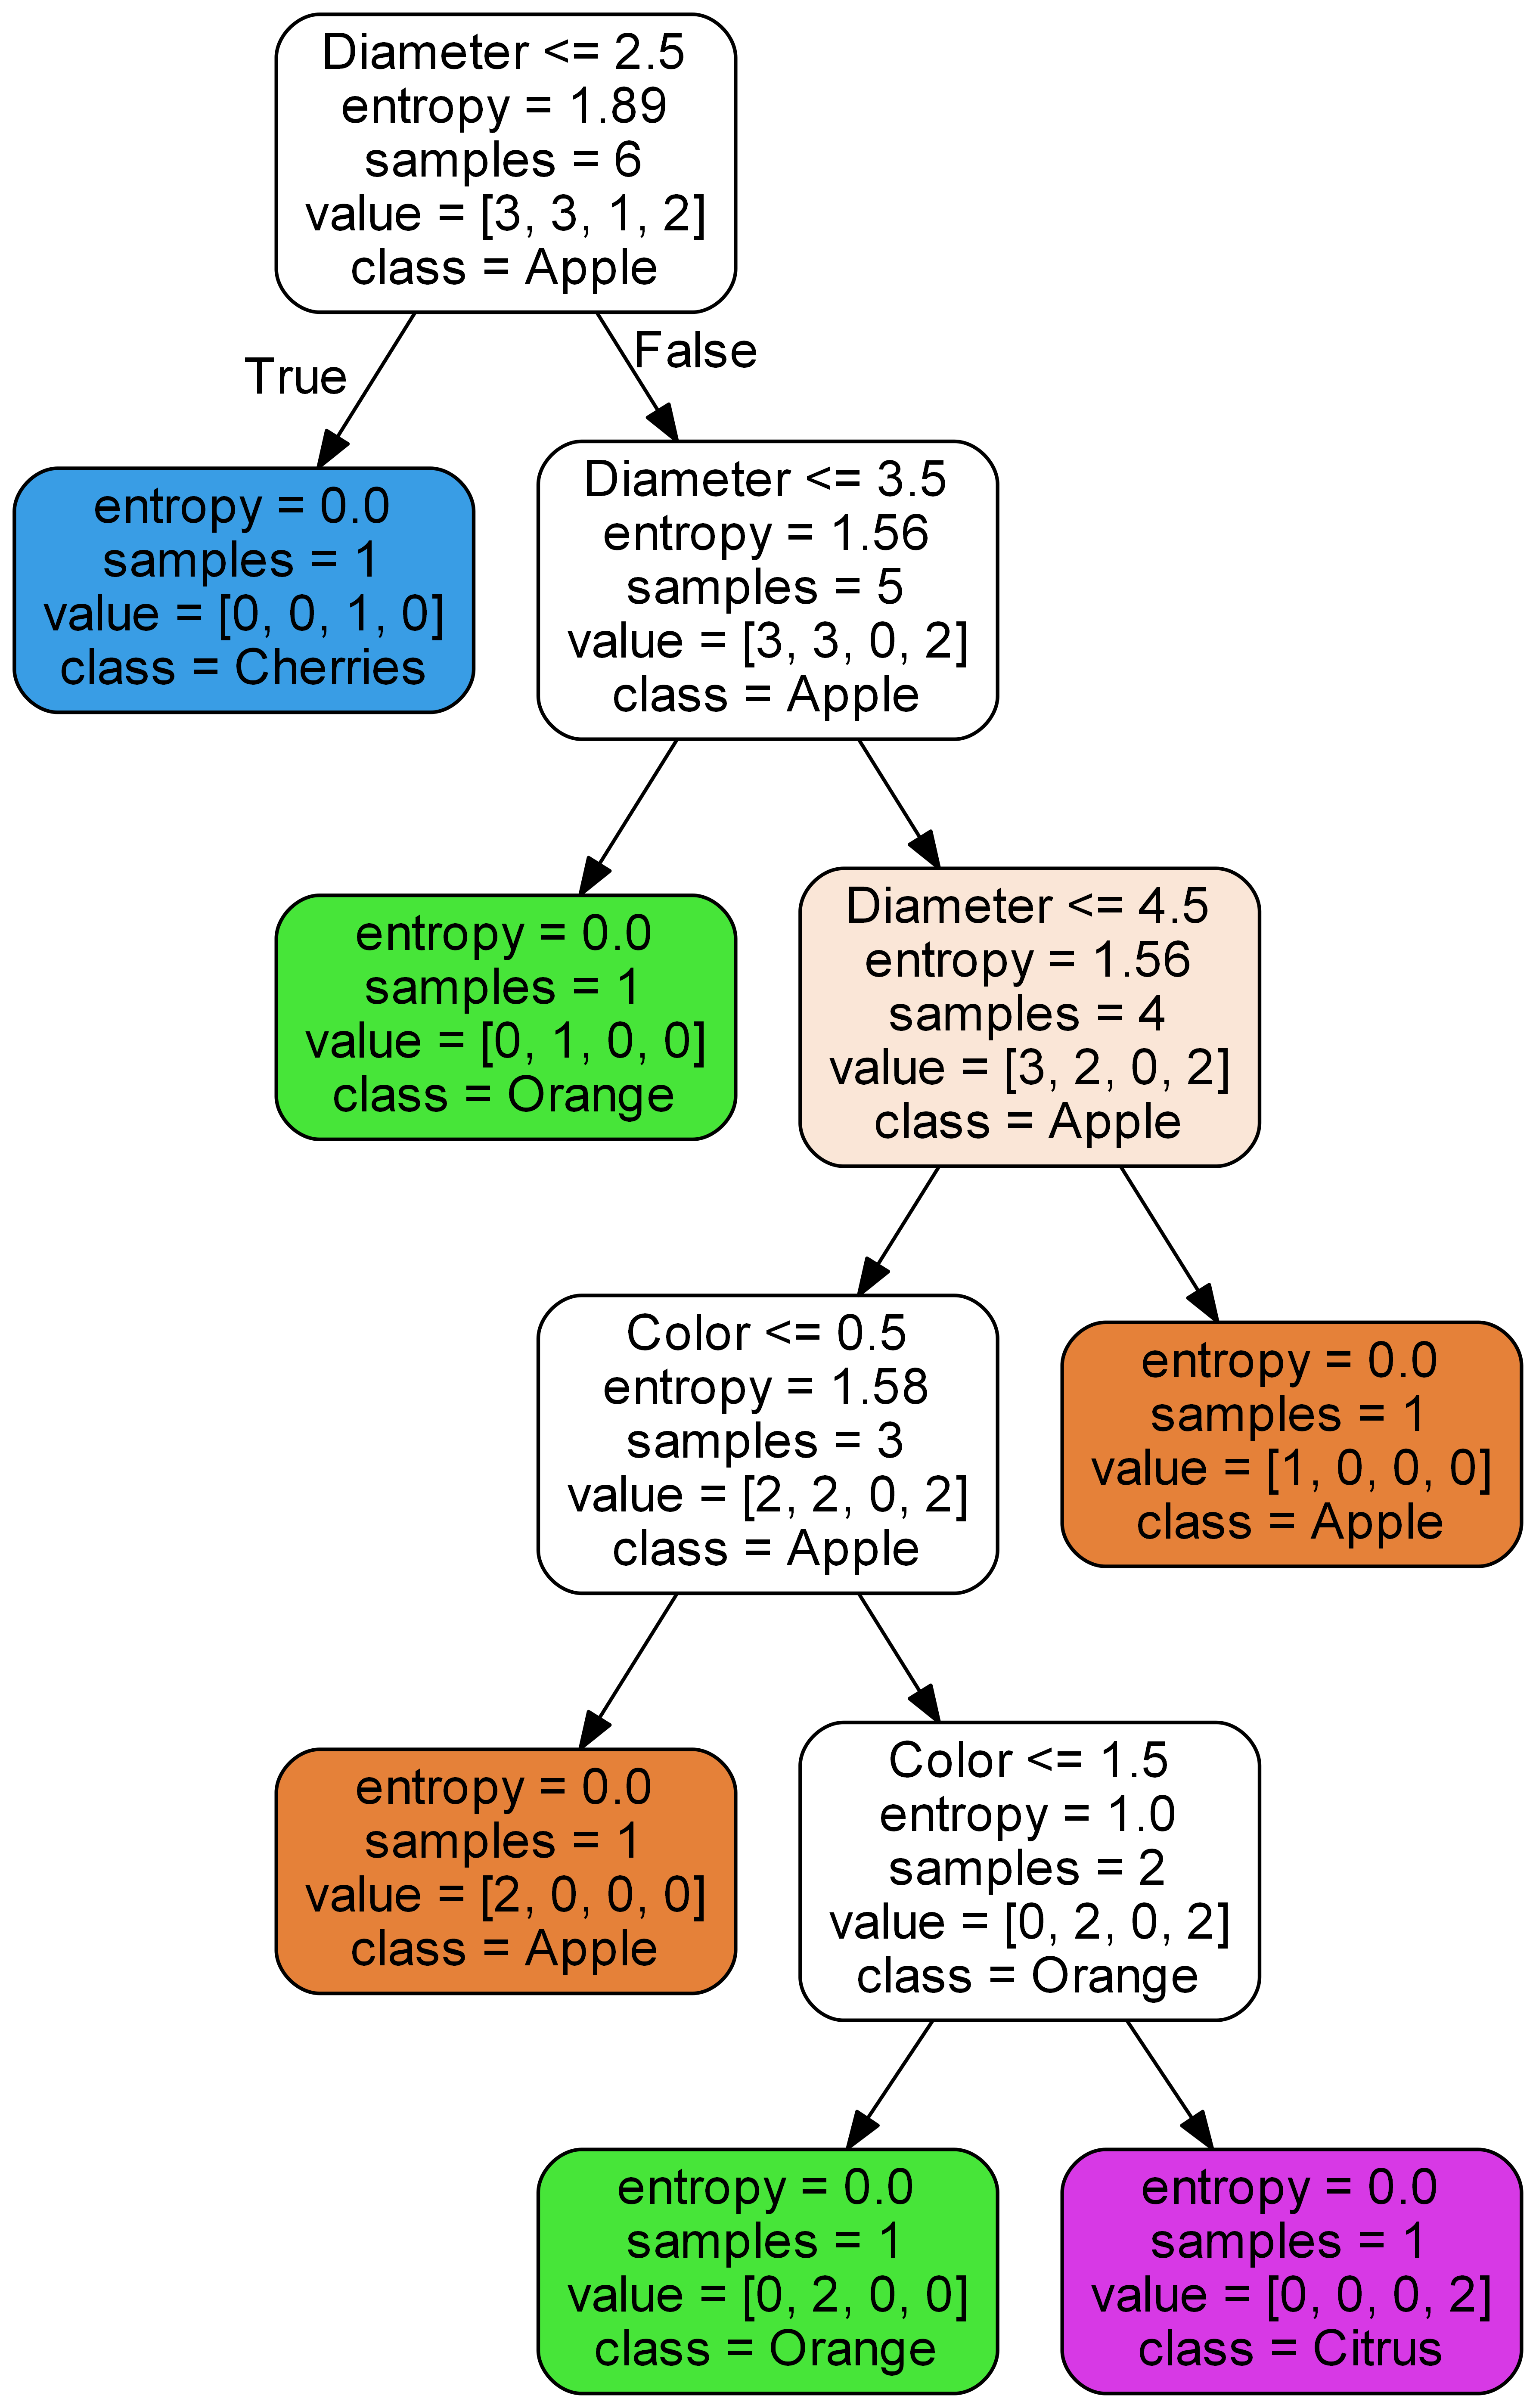

In [11]:
export_graph(clf.estimators_[1])
Image(filename = 'tree.png')

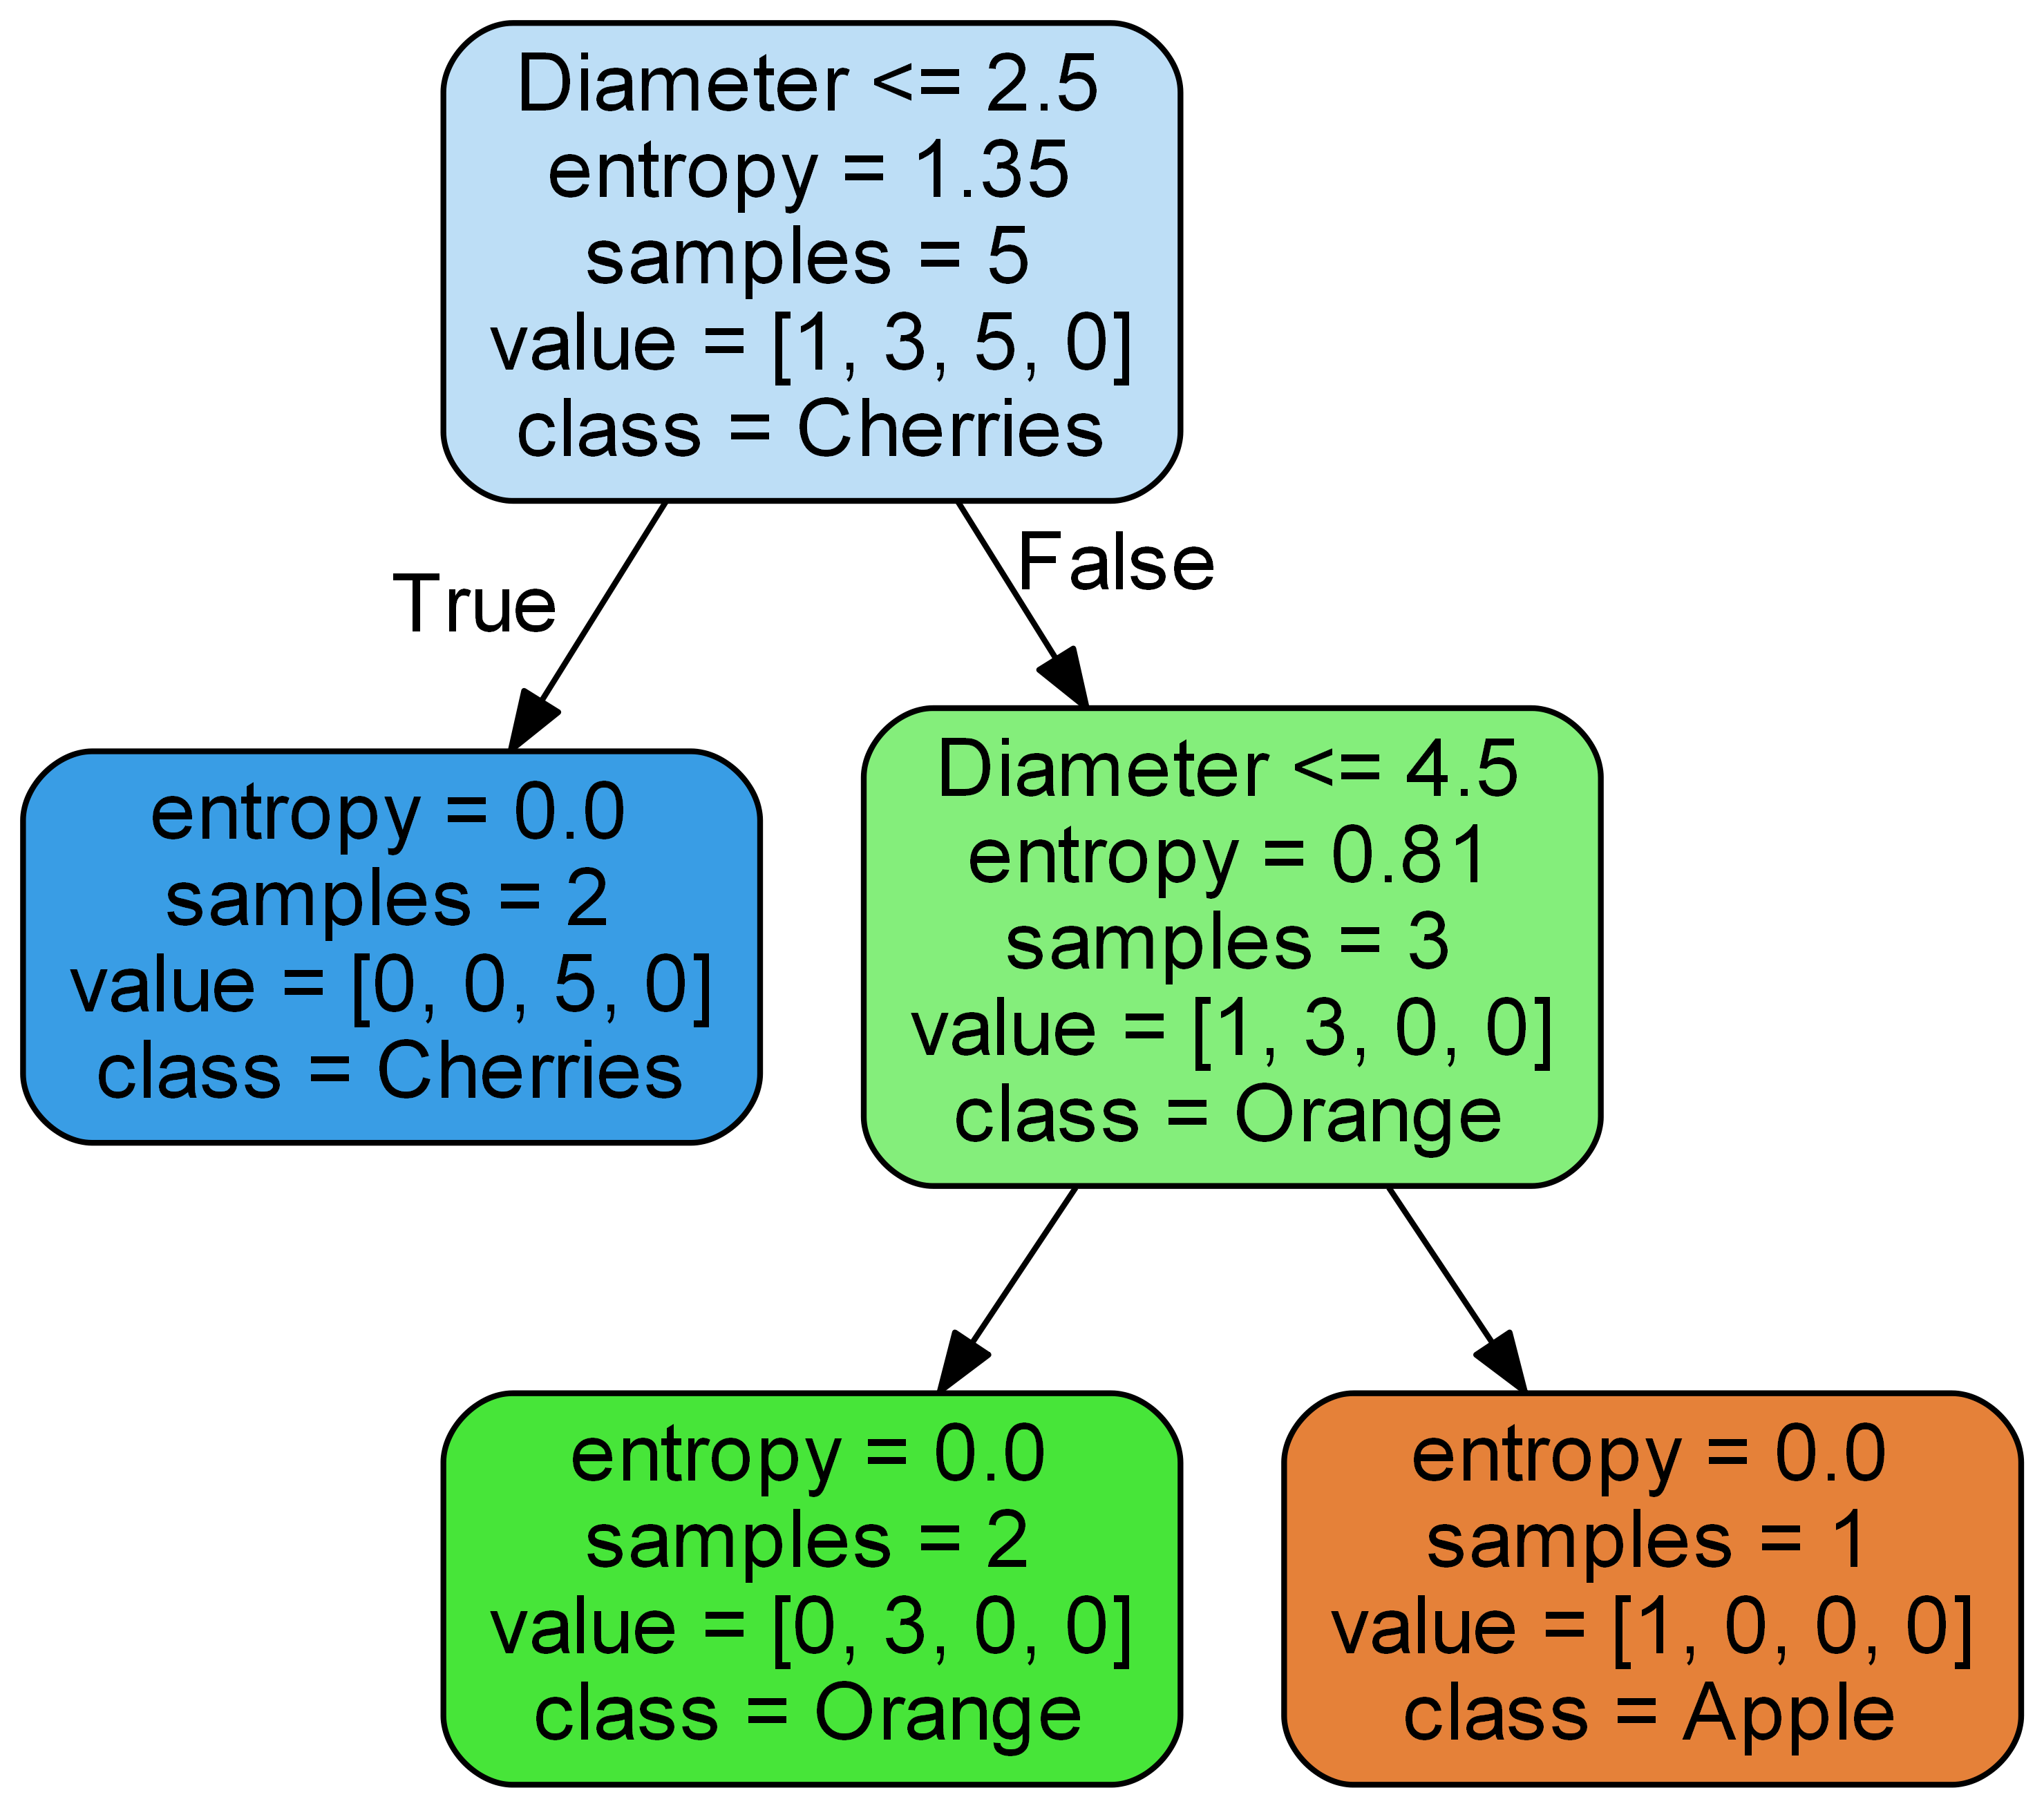

In [12]:
export_graph(clf.estimators_[2])
Image(filename = 'tree.png')